In [14]:
from PIL import Image
import data.imgs as img_data
import os.path as osp
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
from osgeo import gdal, ogr # https://opensourceoptions.com/blog/how-to-install-gdal-for-python-with-pip-on-windows/
import pandas as pd

In [15]:
train_data_path = osp.join(osp.dirname(img_data.__file__), "train_features")
train_label_path = osp.join(osp.dirname(img_data.__file__), "train_agbm")

In [16]:
# To analyse if pixels from the same patch but from consecutive months are correlated, we do two things:
# 1) We calculate the MSE between month x and x + 1 from the same patch
# 2) We calculate the MSE between month x and x + 1 from different patches
# If MSE from 2) is structurally higher than that from 1), we know the pixels from the same patch from different months are correlated.

In [29]:
def flatten_image_from_path(path):
    img_path = osp.join(train_data_path, path)
    dataset = gdal.Open(img_path)
    data = dataset.ReadAsArray()
    return np.average(data, axis=0)

def calculate_mse(path1, path2):
    month0 = flatten_image_from_path(path1)
    month1 = flatten_image_from_path(path2)

    mse = (np.square(month0 - month1)).mean(axis=0)
    return mse

def calculate_average_pixels(paths):
    imgs = []
    for p in paths:
        imgs.append(flatten_image_from_path(p))
    return np.average(imgs, axis=0)

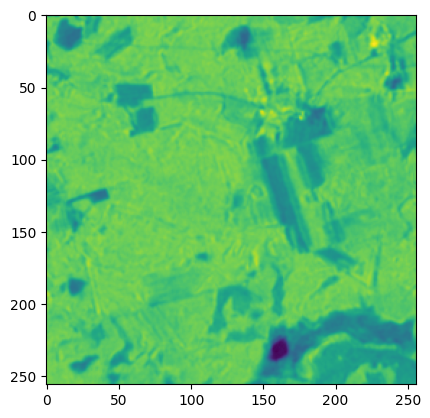

In [31]:
average_img = calculate_average_pixels(["0a3d8f03_S1_00.tif", "0a3d8f03_S1_01.tif", "0a3d8f03_S1_02.tif", "0a3d8f03_S1_03.tif", "0a3d8f03_S1_04.tif", "0a3d8f03_S1_05.tif",
                                        "0a3d8f03_S1_06.tif", "0a3d8f03_S1_07.tif", "0a3d8f03_S1_08.tif", "0a3d8f03_S1_09.tif", "0a3d8f03_S1_10.tif", "0a3d8f03_S1_11.tif"])
plt.imshow(average_img)

In [5]:
# We calculate the MSE between month x and x + 1 from the same patch
avg_mse_same_patches = np.average([calculate_mse("0a3d8f03_S1_00.tif", "0a3d8f03_S1_01.tif"),
                                    calculate_mse("0a3d8f03_S1_01.tif", "0a3d8f03_S1_02.tif"),
                                    calculate_mse("0a3d8f03_S1_02.tif", "0a3d8f03_S1_03.tif"),
                                    calculate_mse("0a3d8f03_S1_03.tif", "0a3d8f03_S1_04.tif")])

In [6]:
# We calculate the MSE between month x and x + 1 from different patches
avg_mse_different_patches = np.average([calculate_mse("0a3d8f03_S1_00.tif", "0a3faec0_S1_01.tif"),
                                        calculate_mse("0a3d8f03_S1_01.tif", "0a3faec0_S1_02.tif"),
                                        calculate_mse("0a3d8f03_S1_02.tif", "0a3faec0_S1_03.tif"),
                                        calculate_mse("0a3d8f03_S1_03.tif", "0a3faec0_S1_04.tif")])

In [7]:
print(avg_mse_same_patches < avg_mse_different_patches, avg_mse_same_patches, avg_mse_different_patches)

True 1.246891 3.8885007


In [8]:
# Conclusion: pixels are very correlated to pixels from consecutive months.